# MD004 ENTREGA5 ANOVA

### <font color='#3d59c6'> PARTE I </font>

Imagina que te llega un conjunto de datos que contiene tres variables categóricas&gt;&gt; A,B y C (con 2 categorías cada una). ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? (2pt)

Para empezar, creo que el primer paso sería realizar un buen análisis descriptivo de todas las variables que existan en el dataset. Entenderlas bien, las distribuciones, el comportamiento de estas, el balanceo de las variables categóricas y la información que nos dan.

Digo esto como primer paso porque bajo mi punto de vista lo ideal sería intentar priorizar qué dos variables tienen más sentido y aportan más información para acabar haciendo la prueba Two-Way con esta.

¿Como decidiremos? Pues una vez hayamos acabado el análisis descriptivo, creo que el siguiente paso sería hacer la prueba One-Way con cada uno de los tres factores, ver la influencia de estos en los datos y entender que efecto tiene cada una de ellas por su cuenta.

Una vez hemos hecho esto, seguiría el proceso haciendo el Two-Way test con las dos variables que hayamos visto que tienen un impacto mayor entre las variables, intentando predecir con la información que hemos extraído en el análisis descriptivo y el One-Way, la importancia de cada variable.

De todas formas, puede suceder que después del estudio inicial, no llegamos a ninguna conclusión que nos ayude a escoger entre las tres variables. Si esto sucediera, no descartaría la opción de hacer las pruebas Two-Way con todas las combinaciones posibles de variables, analizando cada uno de los resultados y buscando la mejor combinación.


### <font color='#3d59c6'> PARTE II </font>

Se dispone del siguiente dataset que contiene en formato csv registros de diferentes deportistas y donde se recoge el valor de las siguientes variables teniendo como factores deporte y género:

- rcc: glóbulos rojos
- wcc: células blancas en la sangre
- hc: hematocritos(%)
- hg: concentración de hemoglobina, en gr por decalitro
- bmi: indice masa corporal
- sex: 2 categorías >> f m
- sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo


###### Data:
202401_ais.csv

(selección de >> origen:https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

###### Se pide:

1. Visualización y comprensión del dataset (2p): Se pide visualizar y realizar estadísticos que ayuden a comprender mejor el dataset dentro del dominio de ANOVA: Análisis descriptivo de las variables continuas y de nuestros factores y análisis de correlaciones
2. Calcular la prueba ANOVA One-Way para la variable sport respecto 2 variables continuas (escoged). Interpretar resultados y acompañar con los gráficos vistos en clase (3p)
3. Calcular la prueba ANOVA Two-Way con ambos factores respecto 2 variables continuas (diferentes a las anteriores): comentad todo lo que observeis, ¿es sport significativa?¿y sex? ¿y conjuntamente? (3p)

;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br>
<div>
<img src="attachment:image-3.png" width="500"/>
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área
- **ggplot2**: la usamos para crear gráficos más personalizables o dico de otra maenra, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables.

In [ ]:
install.packages("gridExtra")
install.packages("GGally")
install.packages("psych")
install.packages('pastecs')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(gridExtra)
library(psych)
library(pastecs)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract




## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [ ]:
data_ais = read.csv(file='202401_ais.csv', header=TRUE, sep=';', dec='.')
head(data_ais)
tail(data_ais)

,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
119,173,5.49,5.9,47.7,15.9,22.28,m,T_400m
120,175,5.03,6.6,44.7,15.9,19.85,m,T_400m
121,199,5.66,8.3,50.2,17.7,23.76,m,Tennis
122,200,5.03,6.4,42.7,14.3,22.01,m,Tennis
123,201,4.97,8.8,43.0,14.9,22.34,m,Tennis
124,202,5.38,6.3,46.0,15.7,21.07,m,Tennis


In [ ]:
str(data_ais)

'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : chr  "f" "f" "f" "f" ...
 $ sport   : chr  "B_Ball" "B_Ball" "B_Ball" "B_Ball" ...


Para empezar usamos la función STR para comenzar a entender un poco mejor que tipo de datos vamos a tratar y cuántas variables tenemos.

Aquí podemos observar una variable que nos da información sobre el número de las filas, que es del tipo 'int', 5 variables numéricas y dos más que son caracteres que serán las variables categóricas del caso.

# Análisis Descriptivo

**Variables Numéricas:**

El análisis descriptivo de todas nuestras variables lo vamos a dividr en dos partes. Empezaremos con las variables numéricas, que son RCC, WCC, HC, HG i BMI. Antes de todo visualizaremos como queda el dataset una vez observamos solo estas variables:

In [ ]:
numericas = data_ais %>%
    select_if(is.numeric)
numericas = numericas[, c('rcc','wcc','hc','hg','bmi')]
head(numericas)

,rcc,wcc,hc,hg,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.96,7.5,37.5,12.3,20.56
2,4.41,8.3,38.2,12.7,20.67
3,4.14,5.0,36.4,11.6,21.86
4,4.11,5.3,37.3,12.6,21.88
5,4.45,6.8,41.5,14.0,18.96
6,4.10,4.4,37.4,12.5,21.04


In [ ]:
summary(numericas)

      rcc             wcc               hc              hg       
 Min.   :3.900   Min.   : 3.300   Min.   :36.40   Min.   :11.60  
 1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98   1st Qu.:13.78  
 Median :4.695   Median : 6.600   Median :43.15   Median :14.60  
 Mean   :4.676   Mean   : 6.613   Mean   :43.00   Mean   :14.52  
 3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23   3rd Qu.:15.40  
 Max.   :5.660   Max.   :10.100   Max.   :50.20   Max.   :17.70  
      bmi       
 Min.   :16.75  
 1st Qu.:20.80  
 Median :22.33  
 Mean   :22.29  
 3rd Qu.:23.73  
 Max.   :26.79  

Con esta función podemos visualizar claramente los cuartiles, mínimo, máximo, media y mediana.

Como veremos a continuación cuando las grafiquemos, no parecen ser variables demasiado dispersas ni con puntos extremos, cosa que tiene sentido porque estamos hablando en todos los casos de personas con una salud buena (recordemos que son deportistas de élite) y estamos analizando datos 'médicos' que pueden tener variaciones, pero no parecen ser excesivas.

Vemos también que la media y la media son muy parejas en todos los casos.

In [ ]:
# Comprobamos si tenemos valores nulos en todas nuestras variables numericas

null_rcc <- sum(is.na(numericas$rcc))
null_wcc <- sum(is.na(numericas$wcc))
null_hc <- sum(is.na(numericas$hc))
null_hg <- sum(is.na(numericas$hg))
null_bmi <- sum(is.na(numericas$bmi))

cat('Nulos en RCC:', null_rcc, '\n')
cat('Nulos en WCC:', null_wcc, '\n')
cat('Nulos en HC:', null_hc, '\n')
cat('Nulos en HG:', null_hg, '\n')
cat('Nulos en BMI:', null_bmi, '\n')

Nulos en RCC: 0 
Nulos en WCC: 0 
Nulos en HC: 0 
Nulos en HG: 0 
Nulos en BMI: 0 


También es imprescindible antes de empezar a analizar y tratar profundamente los datos, darnos cuenta de si estos tienen o no valores nulos a tratar. No es el caso así que podemo seguir sin problemas añadidos.

In [ ]:
grouped_ais <- data_ais %>%
  select(-rownames, -sport) %>%
  group_by(sex) %>%
  summarise_all(list(mean = mean, sd = sd))

grouped_ais


sex,rcc_mean,wcc_mean,hc_mean,hg_mean,bmi_mean,rcc_sd,wcc_sd,hc_sd,hg_sd,bmi_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f,4.404032,6.540323,40.92097,13.67258,21.58952,0.3003084,1.358092,2.396660,0.8907851,2.062748
m,4.947419,6.685484,45.07097,15.35806,22.99516,0.3130649,1.420095,2.101318,0.8193457,1.925875


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


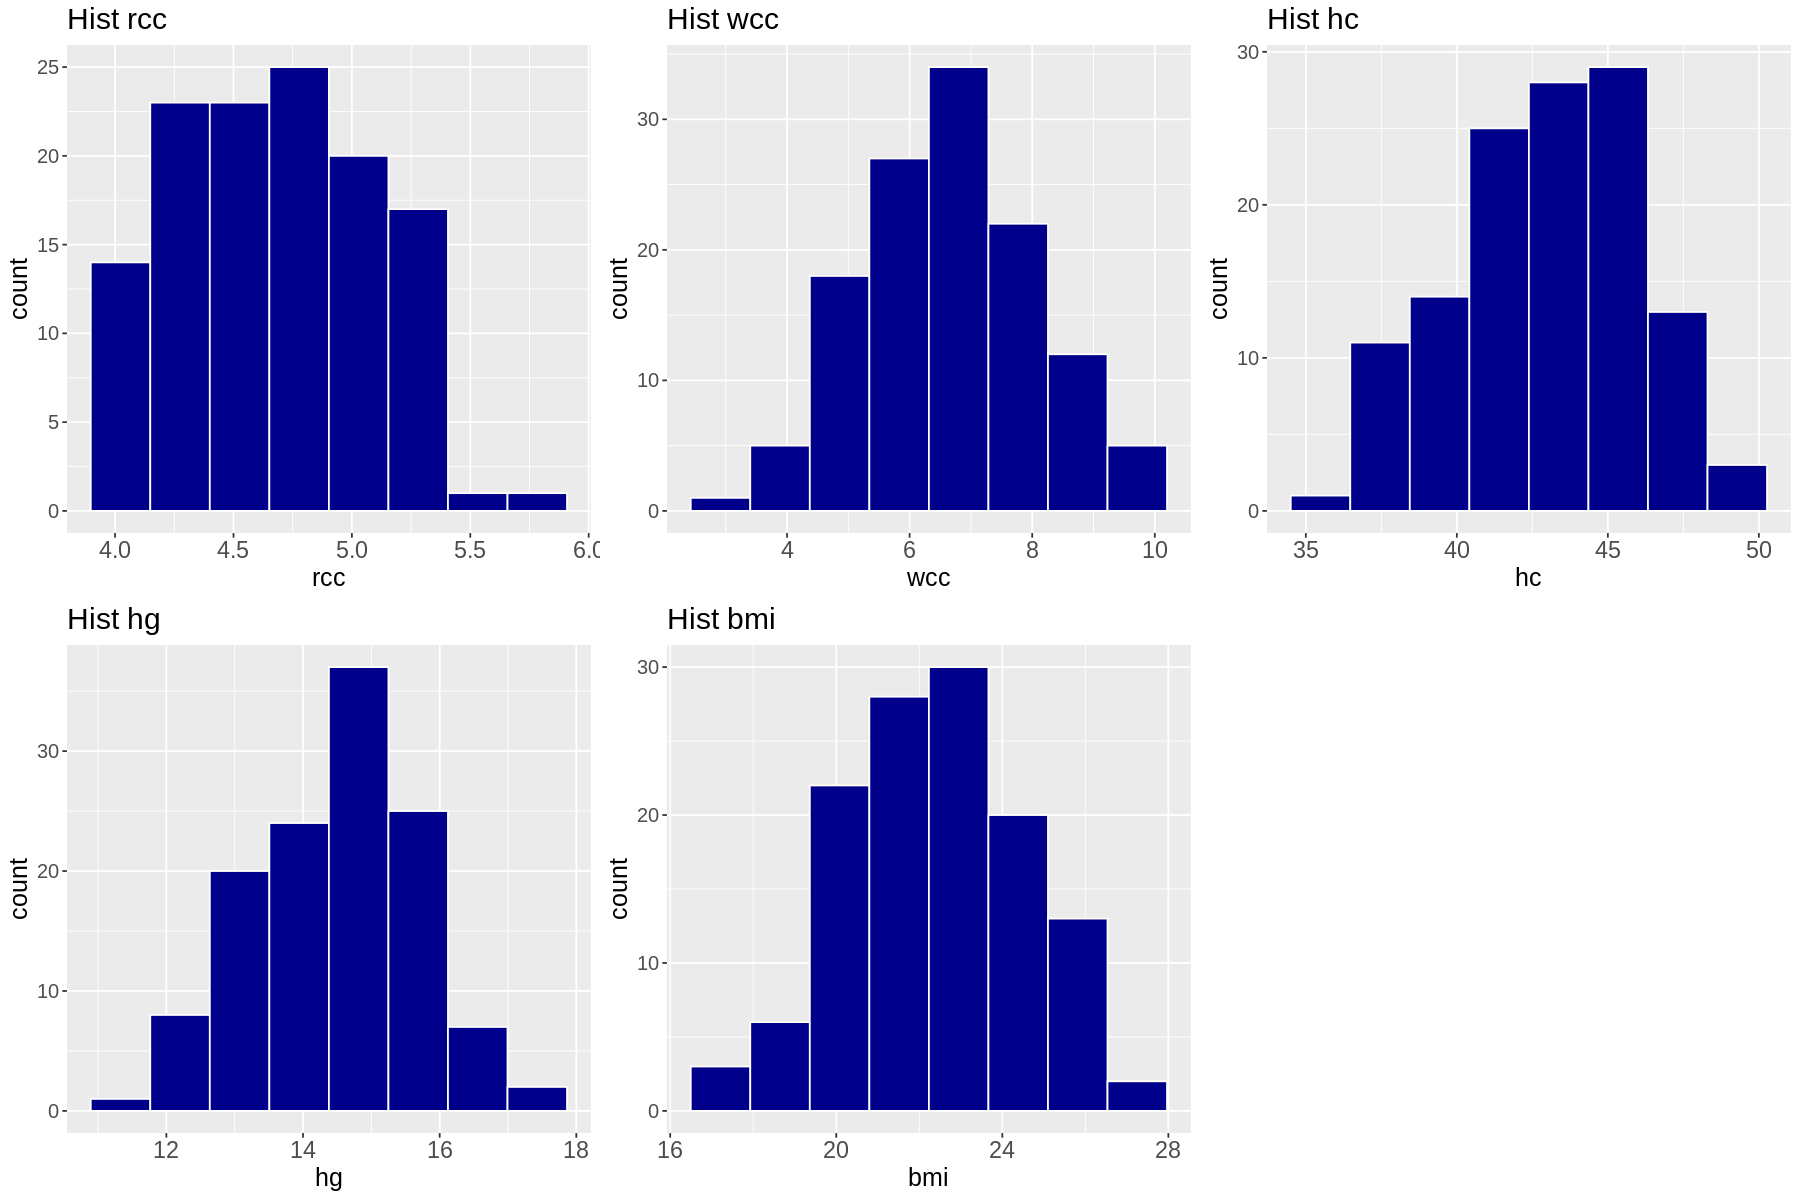

In [ ]:
histogramas = list()
data_hist = colnames(numericas)

for (variable in data_hist) {

  grafico = ggplot(numericas) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = 'darkblue', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste('Hist', variable))


  histogramas[[length(histogramas) + 1]] = grafico
}

options(
  repr.plot.width = 15,
  repr.plot.height = 10
)

do.call('grid.arrange', c(histogramas, ncol = 3))

Y a partir de aquí merece la pena empezar a graficar los datos para seguir ganando información sobre ellos. Con estos histogramas podemos estudiar mejor la forma de su distribución.

A rasgos generales, se observa que prácticamente las 5 variables tienen distribuciones parecidas a una distribución normal. Seguramente la que más dudas nos genera es la primera variable 'RCC', ya que tiene muchos datos en los valores más bajos.

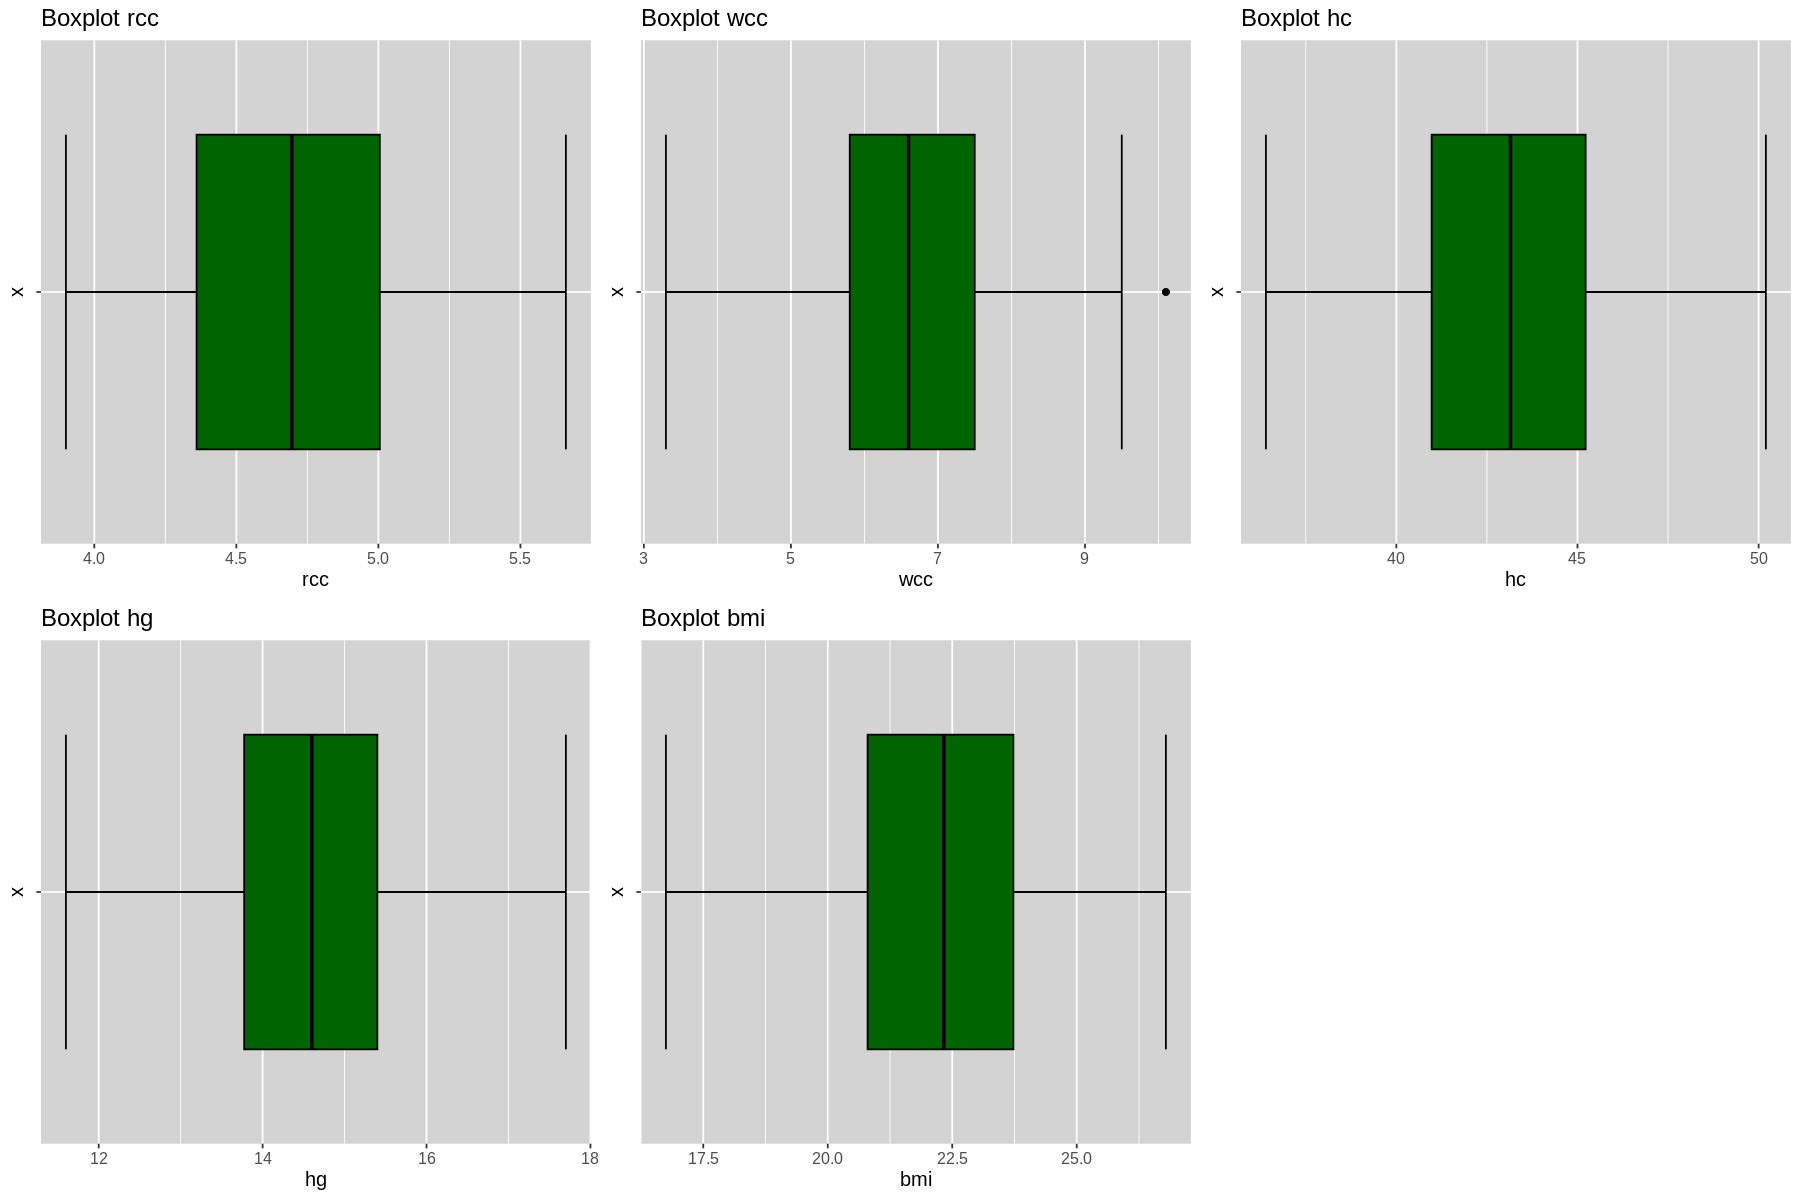

In [ ]:
boxplots = list()
data_box = colnames(numericas)

for (variable in data_box) {

  box_plot = ggplot(numericas, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = 'black', na.rm = TRUE) +
    geom_boxplot(fill = 'darkgreen', color = 'black', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
        panel.grid.major = element_line(color = 'white'),
        panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  boxplots[[variable]] = box_plot
}

options(
  repr.plot.width = 15,
  repr.plot.height = 10
)

grid.arrange(grobs = boxplots, ncol = 3, widths = rep(2, 3))

La siguiente visualización importante es un boxplot. Con ellos vemos que tan solo una variable, la 'WCC', tiene un punto que se puede considerar outlier con esta graficación. Las demás tienen los puntos poco dispersos. Esto es algo que ya hemos ido intuyendo al observar los estadísticos previos.

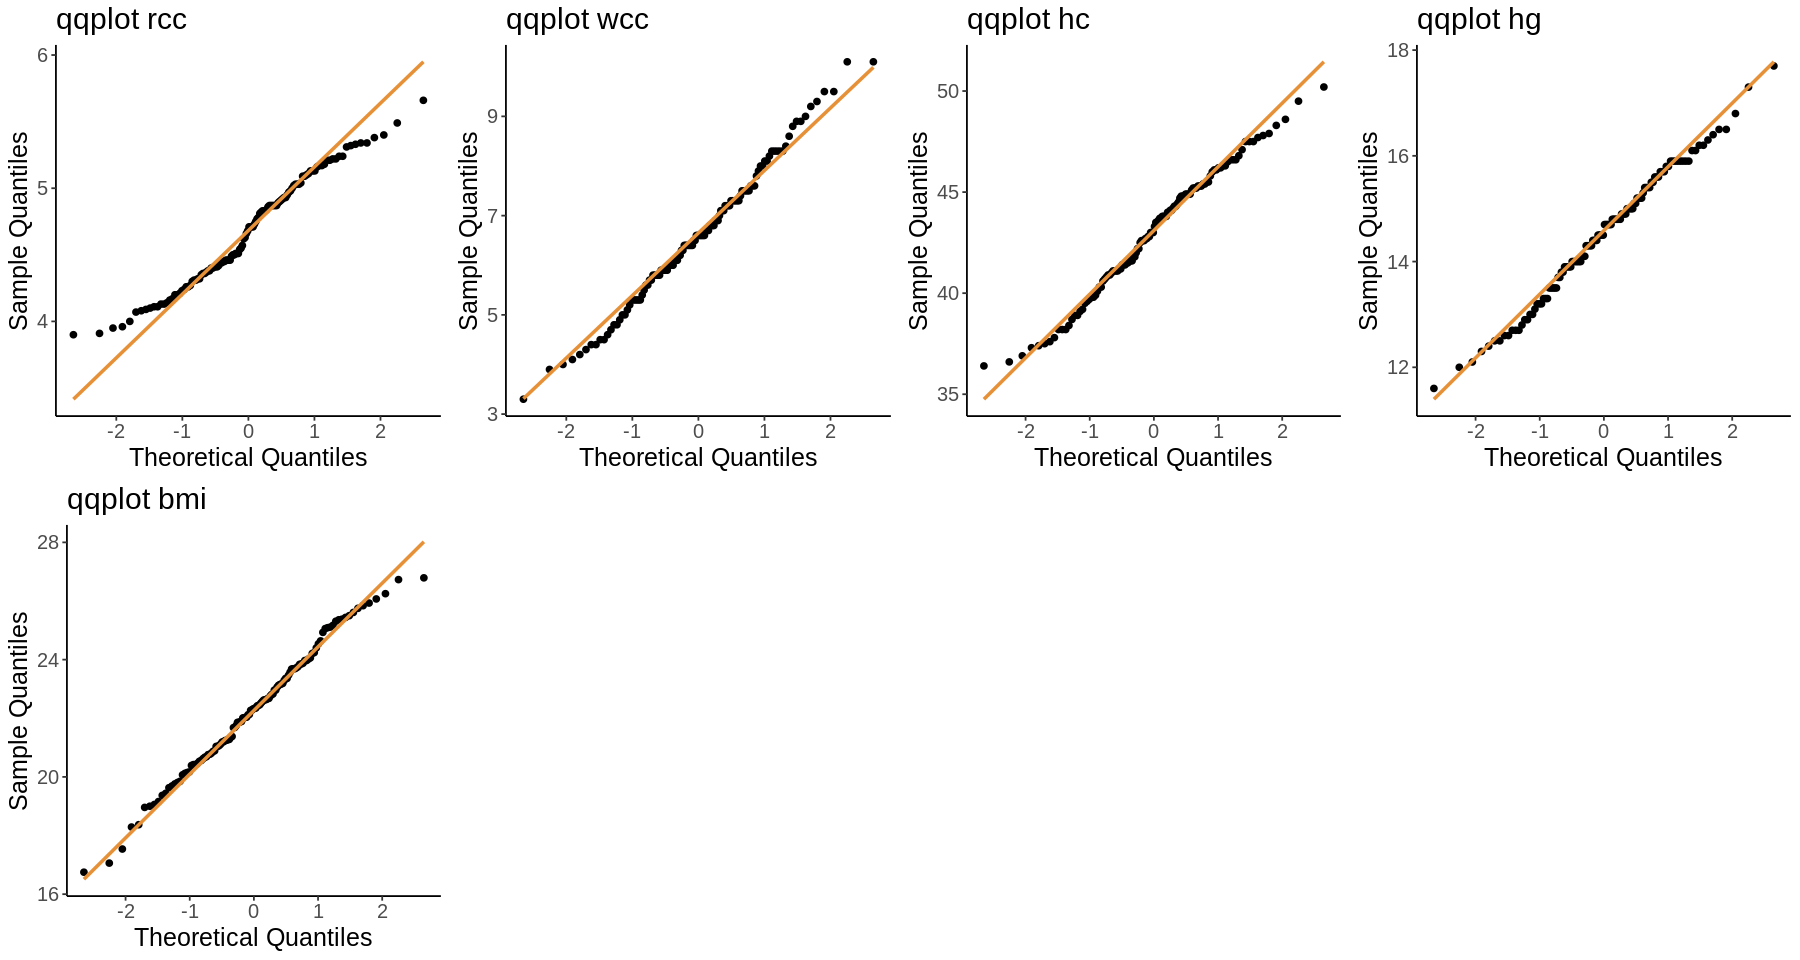

In [ ]:
options(
  repr.plot.width = 15,
  repr.plot.height = 8
)
qq_plots = list()
data_qq = colnames(numericas)

for (i in seq_along(data_qq)) {
  variable = data_qq[i]
  qq_plot = ggplot(numericas[!is.na(numericas[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Y por último, para acabar de confirmar cuán cerca están nuestras variables y sus distribuciones de una distribución normal, es una muy buena opción graficar con qqplots. Este tipo de gráfico nos da una información muy parecida al histograma, la variable 'RCC' es la más lejana a una distribución normal, se observa con claridad que los puntos de su qqplot se separan bastante de la qqline.

Por otro lado, las demás variables si parecen tener una tendencia mucho más cercana a la qqline y, como se podía preveer, parecen ser distribuciones muy cercanas a la normal.

**Variables Categóricas:**

In [ ]:
categoricas = data_ais %>%
  select_if(is.character)
head(categoricas)

,sex,sport
,<chr>,<chr>
1,f,B_Ball
2,f,B_Ball
3,f,B_Ball
4,f,B_Ball
5,f,B_Ball
6,f,B_Ball


Por otro lado, también merece la pena entender las variables categóricas que tenemos, su número de catégorias y sus balanceos (o desbalanceos) para entender mejor que retos nos podemos encontrar.



In [ ]:
#Número de categorias distintas

sex <- length(unique(categoricas$sex))
sport <- length(unique(categoricas$sport))

cat('Número de Categorias en Sex:', sex, '\n')
cat('Número de Categorias en Sport:', sport)

Número de Categorias en Sex: 2 
Número de Categorias en Sport: 5

In [ ]:
null_sex <- sum(is.na(numericas$sex))
null_sport <- sum(is.na(numericas$sport))

cat('Nulos en Sex:', null_sex, '\n')
cat('Nulos en Sex:', null_sport, '\n')


Nulos en Sex: 0 
Nulos en Sex: 0 


Empezamos mirando la cantidad de categorias que tiene cada variable y los posibles valores nulos, que no los hay.

In [ ]:
data_ais_cat = data_ais %>%
  select_if(is.character)
head(data_ais_cat)

,sex,sport
,<chr>,<chr>
1,f,B_Ball
2,f,B_Ball
3,f,B_Ball
4,f,B_Ball
5,f,B_Ball
6,f,B_Ball


In [ ]:
ais_cat = c('sp','sex')

$sport

$sex


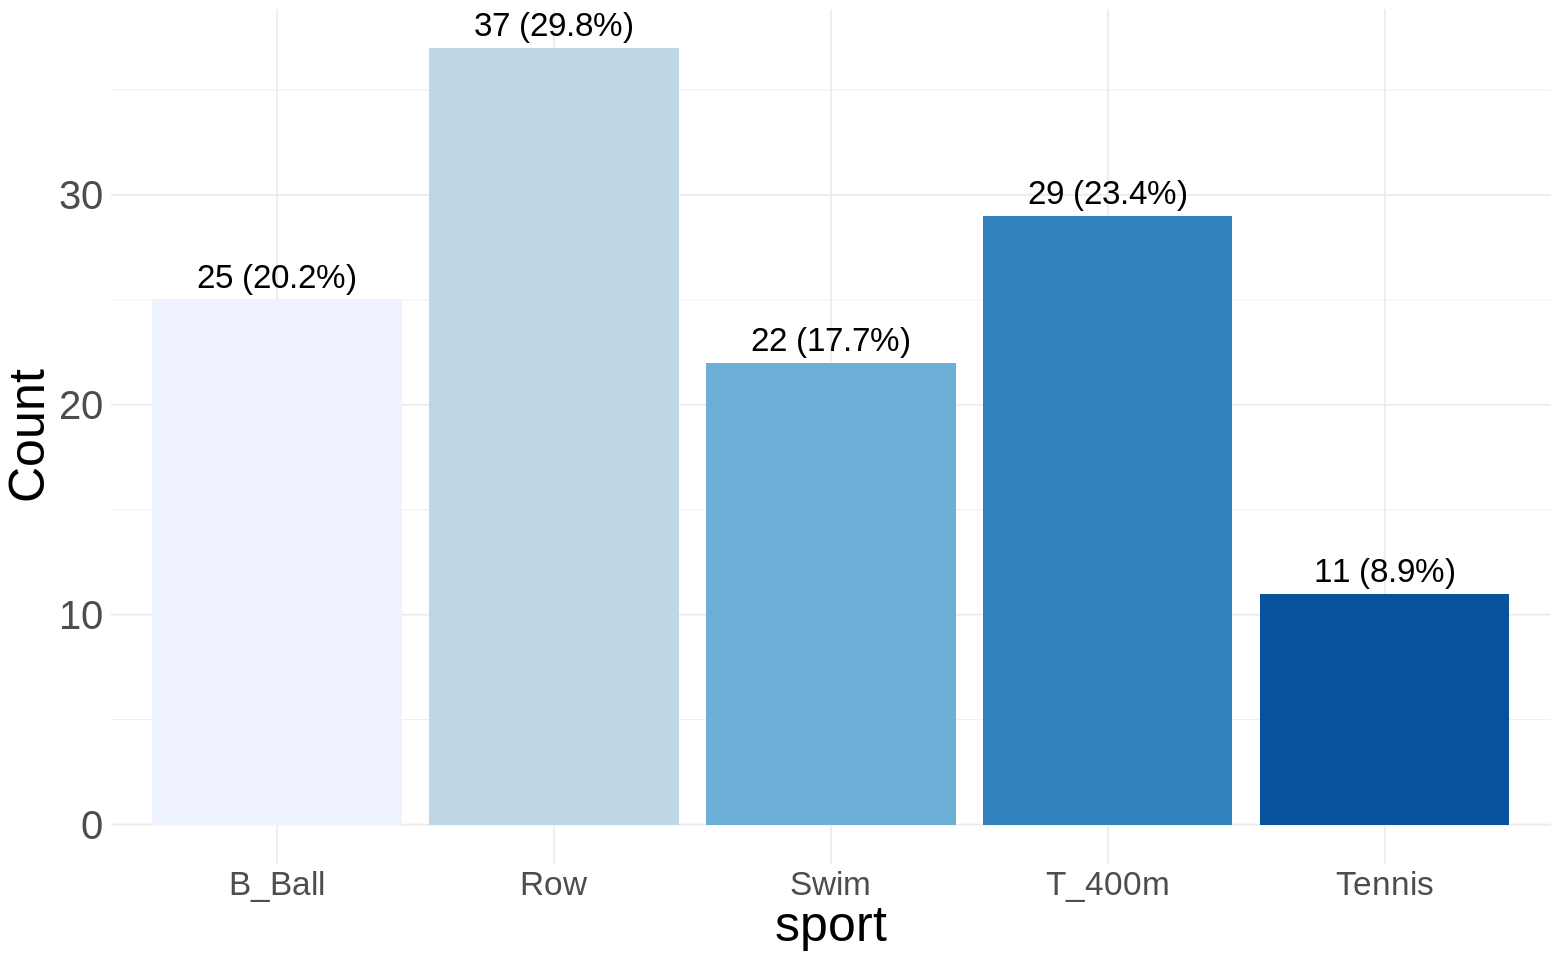

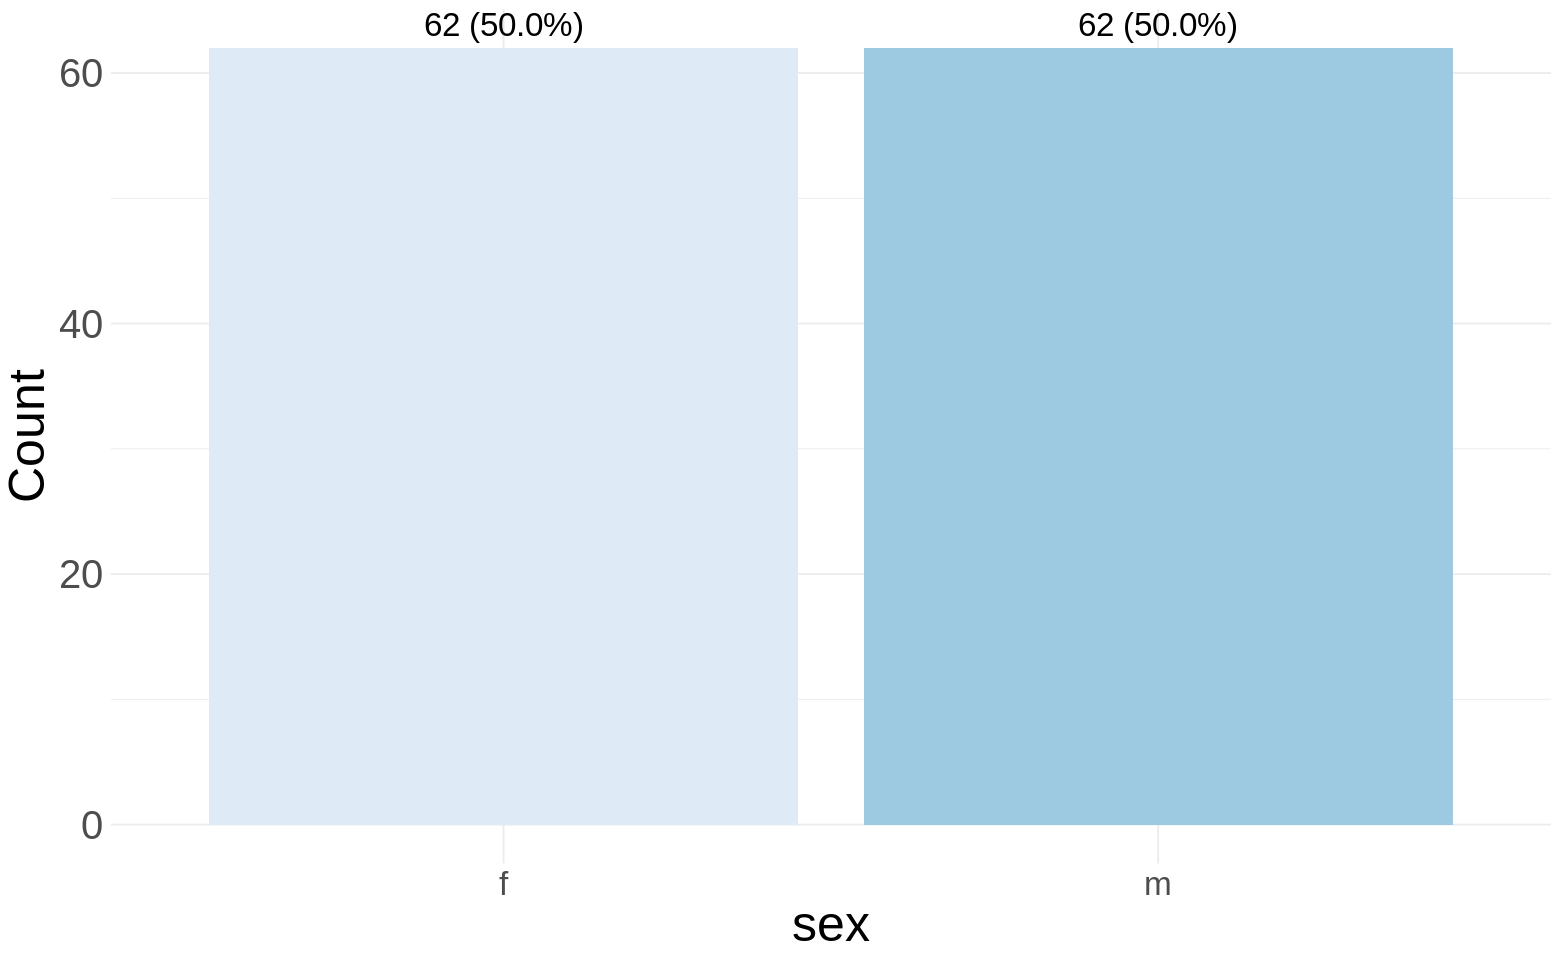

In [ ]:
options(
  repr.plot.width = 13,
  repr.plot.height = 8
)

bar_plots = list()
cat_list = data_ais_cat[c('sport','sex')]
cat = lapply(cat_list, list)

for (variable in names(cat)) {
  bar_plot = ggplot(data_ais_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar(stat = 'count', position = 'dodge') +
    scale_fill_brewer(palette = 'Blues') +
    labs( x = variable, y = 'Count') +
    theme_minimal() +
    theme(legend.position = 'none', text = element_text(size = 30), axis.text.x = element_text(size = 20)) +
    geom_text(
      stat = 'count',
      aes(label = sprintf('%d (%.1f%%)', after_stat(count), after_stat(count) / sum(after_stat(count)) * 100)),
      position = position_dodge(0.9),
      vjust = -0.5,
      size = 7
    )

  bar_plots[[variable]] = bar_plot
}

print(bar_plots)

Y, por otro lado, merece la pena observar como de balanceados están estos grupos para entender posibles tendencias que pueden existir.

Como observamos, el factor Sex esta perfectamente balanceada, tiene exactamente las mismas observaciones de cada sexo. Por otro lado, existe un poco más de desbalance entre los deportes, siendo Row el que más observaciones tiene y Tennis el que menos.

# Análisis Matriz Covarianza

Una vez hemos estudiado bien la distribución de los datos y hemos empezado a entender el dataset, merece la pena empezar a estudiar como se relacionan entre ellas nuestras variables. Para ello, lo primero que tenemos que hacer son las matrices de covariancia y correlación, que nos darán una primera idea sobre si hay informaciones que se están repitiendo debido a que varias variables nos dicen lo mismo o situaciones del estilo.

In [ ]:
round(cov(numericas),2)

,rcc,wcc,hc,hg,bmi
rcc,0.17,0.10,1.14,0.43,0.17
wcc,0.10,1.92,0.84,0.28,0.26
hc,1.14,0.84,9.38,3.52,1.40
hg,0.43,0.28,3.52,1.44,0.62
bmi,0.17,0.26,1.40,0.62,4.45


In [ ]:
round(cor(numericas),2)

,rcc,wcc,hc,hg,bmi
rcc,1.00,0.18,0.91,0.87,0.20
wcc,0.18,1.00,0.20,0.17,0.09
hc,0.91,0.20,1.00,0.96,0.22
hg,0.87,0.17,0.96,1.00,0.24
bmi,0.20,0.09,0.22,0.24,1.00


Siempre va bien dimensionar los datos, y gracias a la matriz de correlación entendemos mejor lo que estamos haciendo y lo que tenemos entre manos, ya que todos los estadísticos están en la misma escala.

Como podemos observar, las variables más relacionadas entre sí son la RCC con HC y la RCC con HG, que tienen una correlación entre ellas de 0,91 y 0,87 respectivamente.

¿Tiene sentido?

Glóbulos rojos, hematocritos y concentración de hemoglobina en gr por decalitro.

Todos ellos están estrechamente relacionados en el transporte de oxígeno en el cuerpo, los primeros, son las células sanguíneas que contienen la hemoglobina, los segundos es una proteína rica en hierro que, como hemos dicho, está en los glóbulos rojos y la tercera variable es el porcentaje de glóbulos rojos en la sangre total.

Una vez conocemos un poco más sobre el dominio que estamos tratando, vemos que tiene mucho sentido que la relación entre todas ellas sea alta.

Y a continuación, graficaremos todas estas correlaciones con una serie de scatterplots donde veremos la distribución espacial de estos puntos y veremos las correlaciones (o no correlaciones) de una forma muy clara.

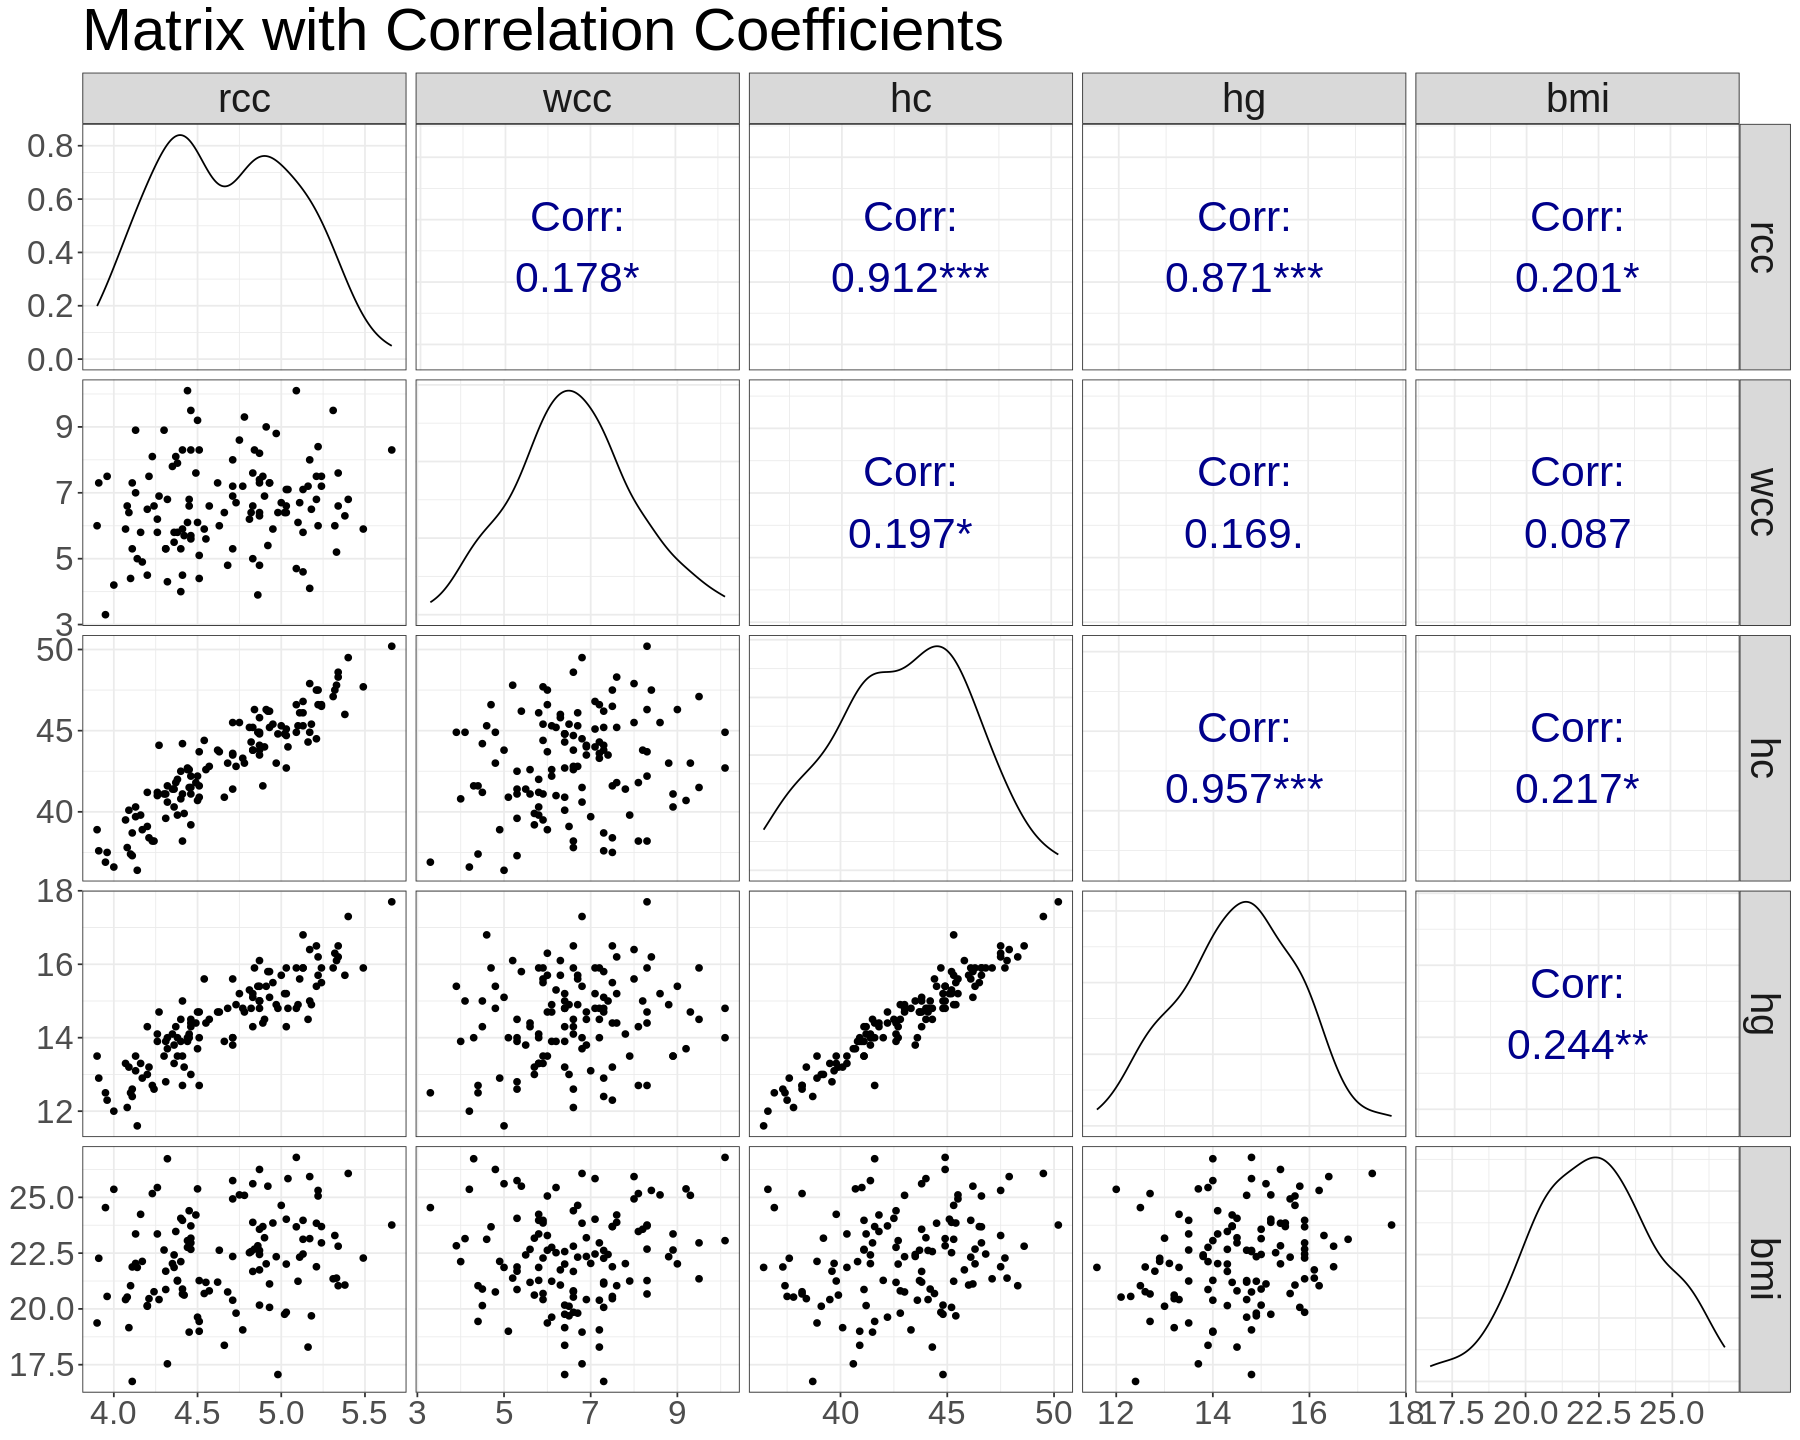

In [ ]:
options(
  repr.plot.width = 15,
  repr.plot.height = 12
)
ggpairs(
  numericas,
  title = "Matrix with Correlation Coefficients",
  upper = list(continuous = wrap("cor", size = 9, color ='darkblue'))) +
theme_bw() +
theme(
  text = element_text(size = 30),
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25))

In [ ]:
data_pairplot <- data_ais[, -(which(names(data_ais) %in% c("rownames")))]
head(data_pairplot)

,rcc,wcc,hc,hg,bmi,sex,sport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


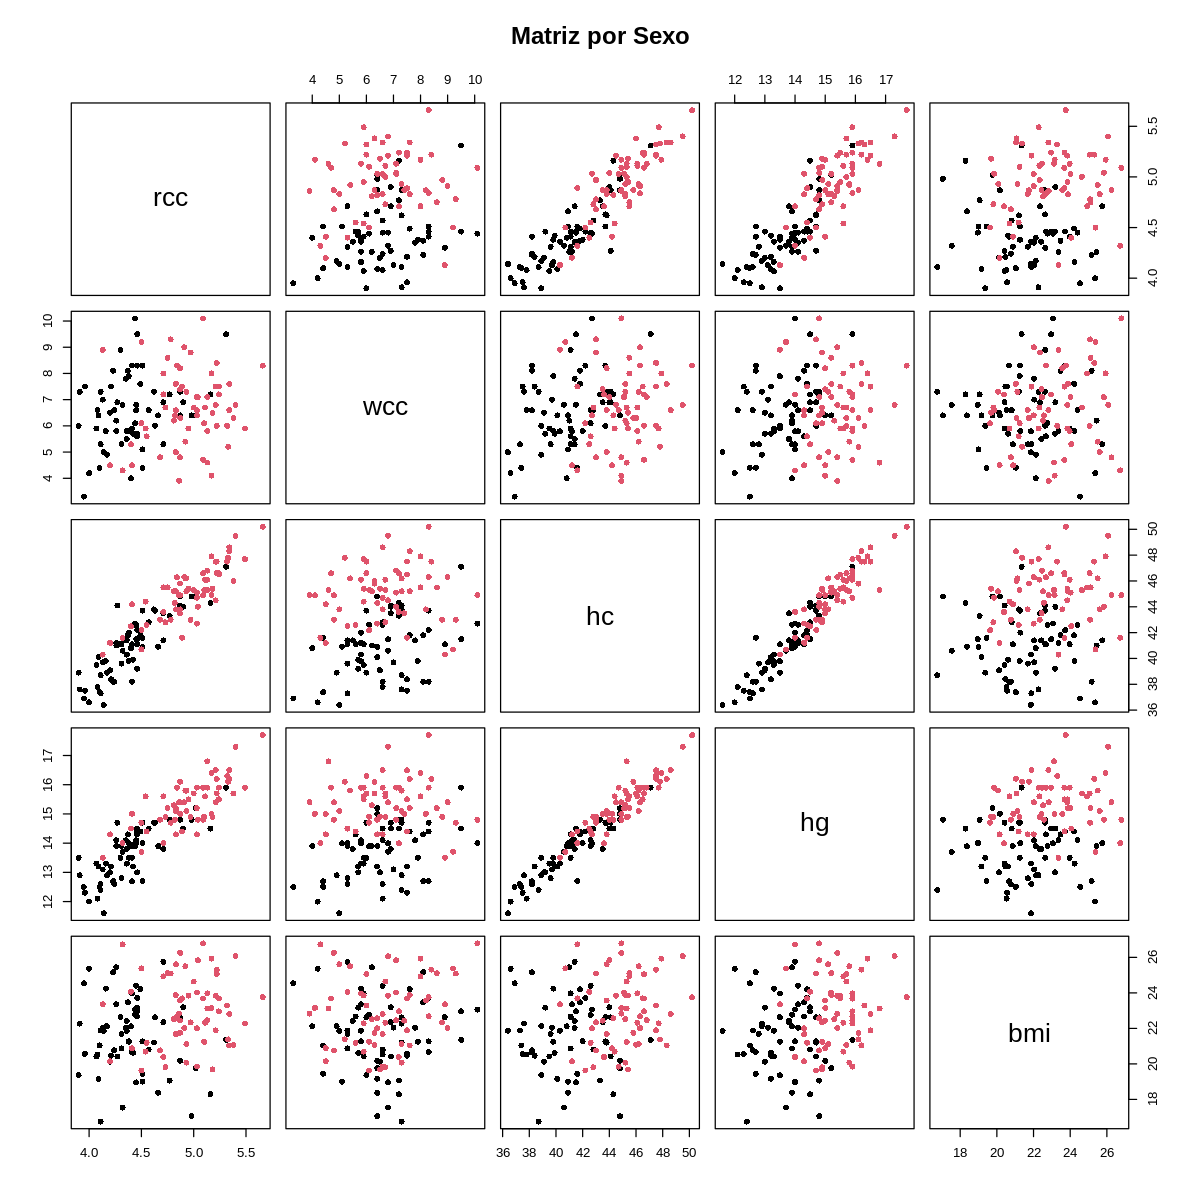

In [ ]:
# Matriz con segregación por Sexo

pairs(data_pairplot[, 1:5], pch = 16, main = "Matriz por Sexo", col = as.numeric(as.factor(data_pairplot$sex)))



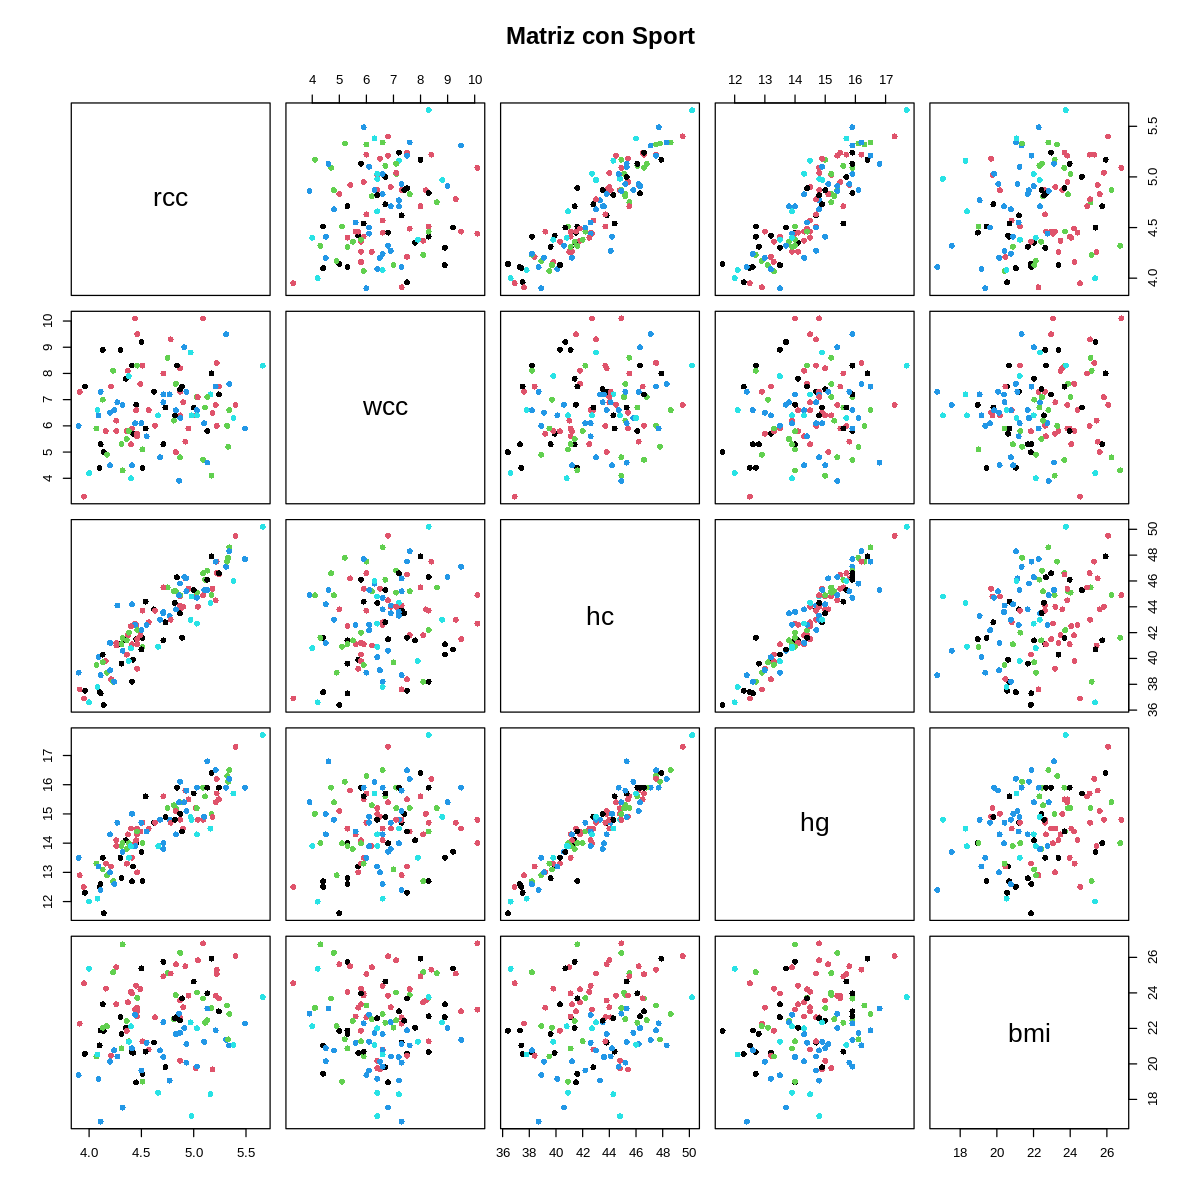

In [ ]:
# Matriz con segregación por Sport

pairs(data_pairplot[, 1:5], pch = 16, main = "Matriz con Sport", col = as.numeric(as.factor(data_pairplot$sport)))

Por último, un análisis que me ha parecido muy interesante ha sido el que nos proporcionan estos dos últimos gráficos.

En el primero podemos observar los scatter plots de las variables pero coloreados en función del sexo de las observaciones. De esta manera, podemos observar si este afecta directamente a los resultados o no y empezar a intuir en que variables puede afectar más una segregación por sexo y en cuáles no tiene sentido, ya que los resultados son muy parecidos.

- En este caso, parece haber mucha separabilidad especialmente en las variables de RCC, HC y HG. Si nos fijamos los puntos de colores están claramente separados.

En el segundo gráfico, hacemos un estudio muy parecido, pero en este caso coloreamos por deporte.

- La realidad es que aquí es difícil ver tendencias clarísimas o grupos que actúan de una forma muy concreta.

¿Sacaremos las conclusiones relacionadas con esto cuando usemos la prueba de ANOVA?

# TEST ANOVA

Una vez ya hemos estudiado profundamente nuestros datos, empezaremos a plantear y interpretar los tests ANOVA. Para ello, primero merece la pena analizar si nuestros datos cumplen con los supuestos necesarios para estos tests.

Supuestos:
- Homoscedasticidad entre grupos
- Distribución normal por categorías
- Independencia de la muestra

Los dos primeros supuestos los vamos a comprobar a través de tests y visualizaciones para entender si se cumplen o no y cuán cerca están de cumplirse, por otro lado, vamos a asumir independencia de la muestra, ya que nos creemos que son datos totalmente independientes entre ellos y sin sesgos.

- rcc: glóbulos rojos
- wcc: células blancas en la sangre
- hc: hematocritos(%)
- hg: concentración de hemoglobina, en gr por decalitro
- bmi: indice masa corporal
- sex: 2 categorías >> f m
- sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo

**Normalidad de Sex:**

In [ ]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('f', 'm')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_ais, sex == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W       rcc   f 0.9527609  0.018
W1      rcc   m 0.9796056  0.390
W2      wcc   f 0.9889641  0.852
W3      wcc   m 0.9871224  0.762
W4       hc   f 0.9822609  0.509
W5       hc   m 0.9917297  0.953
W6       hg   f 0.9853917  0.670
W7       hg   m 0.9881680  0.815
W8      bmi   f 0.9891767  0.862
W9      bmi   m 0.9737279  0.204


Todas las variables superan el test de Normalidad al segregar por la categoría Sexo, excepto la variable de los glóbulos rojos que en el caso del sexo femenino tiene este resultado: **RCC: Pvalue < 0.05**. Por lo tanto, habrá que tener en cuenta esto a la hora de crear un modelo o tratar los datos.

In [ ]:
sum(data_ais$sex == 'f')


[1] 62

Teniendo en cuenta que tenemos 62 valores del sexo femenino, se puede deducir que es una muestra suficientemente grande como para valorar que aunque el test no de exactamente que es una distribución normal, tenderá a ello por el Teorema del Límite Central.

**Normalidad Sport:**

In [ ]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
#resultados = data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  cat('Shapiro test variable', variable, ':\n')
  for (cat in unique(data_ais$sport)) {
    subset_data <- data_ais[data_ais$sport == cat, ]
    result <- shapiro.test(subset_data[[variable]])
    cat('Categoria:', cat, '- Shapiro Test:', result$statistic, '- p-value:', result$p.value, '\n')
  }
  cat('\n')
}

Shapiro test variable rcc :
Categoria: B_Ball - Shapiro Test: 0.9668856 - p-value: 0.5675464 
Categoria: Row - Shapiro Test: 0.9659142 - p-value: 0.3088028 
Categoria: Swim - Shapiro Test: 0.9164542 - p-value: 0.06421642 
Categoria: T_400m - Shapiro Test: 0.9755527 - p-value: 0.7165133 
Categoria: Tennis - Shapiro Test: 0.9602871 - p-value: 0.7752688 

Shapiro test variable wcc :
Categoria: B_Ball - Shapiro Test: 0.9627397 - p-value: 0.4716964 
Categoria: Row - Shapiro Test: 0.9608115 - p-value: 0.2143439 
Categoria: Swim - Shapiro Test: 0.9621063 - p-value: 0.5329979 
Categoria: T_400m - Shapiro Test: 0.9536983 - p-value: 0.2280543 
Categoria: Tennis - Shapiro Test: 0.9146806 - p-value: 0.2767915 

Shapiro test variable hc :
Categoria: B_Ball - Shapiro Test: 0.9677765 - p-value: 0.5893536 
Categoria: Row - Shapiro Test: 0.9884984 - p-value: 0.9621523 
Categoria: Swim - Shapiro Test: 0.9381614 - p-value: 0.1813479 
Categoria: T_400m - Shapiro Test: 0.9613755 - p-value: 0.3552438 
Categ

Al mirar la normalidad en la categoría Sport, vemos que podemos aceptar todas las hipótesis nulas, significando esto que podemos aceptar que todas las distribuciones son normales por categoría.

**Homocedasticidad**

In [ ]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sex, data = data_ais)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   0.1046790 0.7462853
Bartlett's K-squared1      wcc   0.1205474 0.7284416
Bartlett's K-squared2       hc   1.0434306 0.3070249
Bartlett's K-squared3       hg   0.4223403 0.5157716
Bartlett's K-squared4      bmi   0.2849915 0.5934481


In [ ]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sport, data = data_ais)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable
                                                              , Estadistico = resultado_bartlett$statisti
                                                              , PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   2.7209300 0.6055571
Bartlett's K-squared1      wcc   0.9647336 0.9150955
Bartlett's K-squared2       hc   2.4492440 0.6537469
Bartlett's K-squared3       hg   5.1199980 0.2752051
Bartlett's K-squared4      bmi   4.3053131 0.3662603


En este caso estamos mirando, con la prueba de Bartlett la homogeneidad de las varianzas. Usaremos este test para probar que las varianzas son iguales en todas las muestras. Esta será nuestra hipótesis nula a comprobar y la alternativa es que las variancias tienen diferencias evidentes.

Como podemos ver en los resultados, en ambos casos el resultado es el mismo, aceptamos todas las hipótesis nulas y, por lo tanto, podemos concluir que las varianzas de nuestros datos son iguales.

# ONE WAY ANOVA

Vamos a usar el análisis de variancia para intentar detectar si existen diferencias importantes entre las medias de los distintos grupos de datos que tenemos. Este test nos va a dar información que nos debería ayudar a pulir nuestro modelo y evitar posible ruido que incorporarían variable que aportan la misma información.

Vamos a elegir solo dos variables para el análisis one way, en nuestro caso, he decidido analizar las variables 'RCC' y 'WCC'.

En este caso, la hipótesis nula va a ser que no existen diferencias significativas entre las medias y la alternativa será que sí existen.

In [ ]:
anova1 = aov(rcc ~  sport, data = data_ais)
summary(anova1)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4  0.466  0.1164   0.687  0.603
Residuals   119 20.168  0.1695               

In [ ]:
anova2 = aov(wcc ~ sport, data = data_ais)
summary(anova2)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4   9.45   2.363    1.24  0.298
Residuals   119 226.73   1.905               

Una vez hechos las pruebas de ANOVA para cada una de las variables, podemos observar que ambos p-values son superiores a 0,05 y, por tanto, nos llevan a aceptar la hipótesis nula, es decir, nos llevan a concluir que no existen diferencias significativas entre las medias de la variable continua rcc y wcc cuando las separamos por Sport.

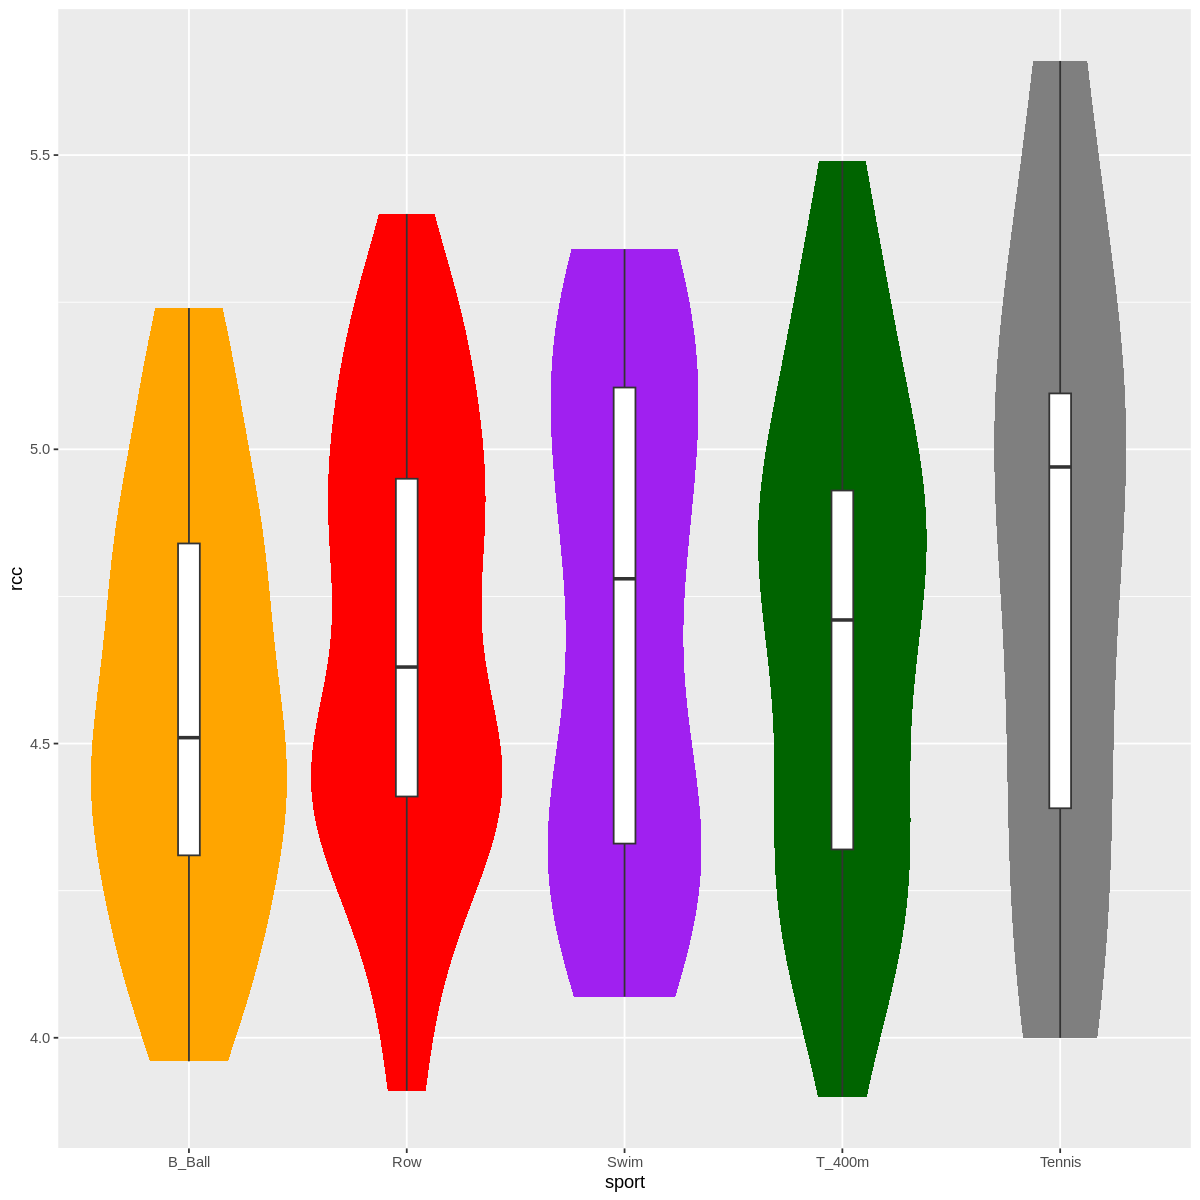

In [ ]:
ggplot(data_ais, aes(sport, rcc)) +
  geom_violin(color = NA, aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = 'orange', 'Row' = 'Red', 'Swim' = 'purple', 'T_400m' = 'darkgreen', 'Tennis' = 'blue'))


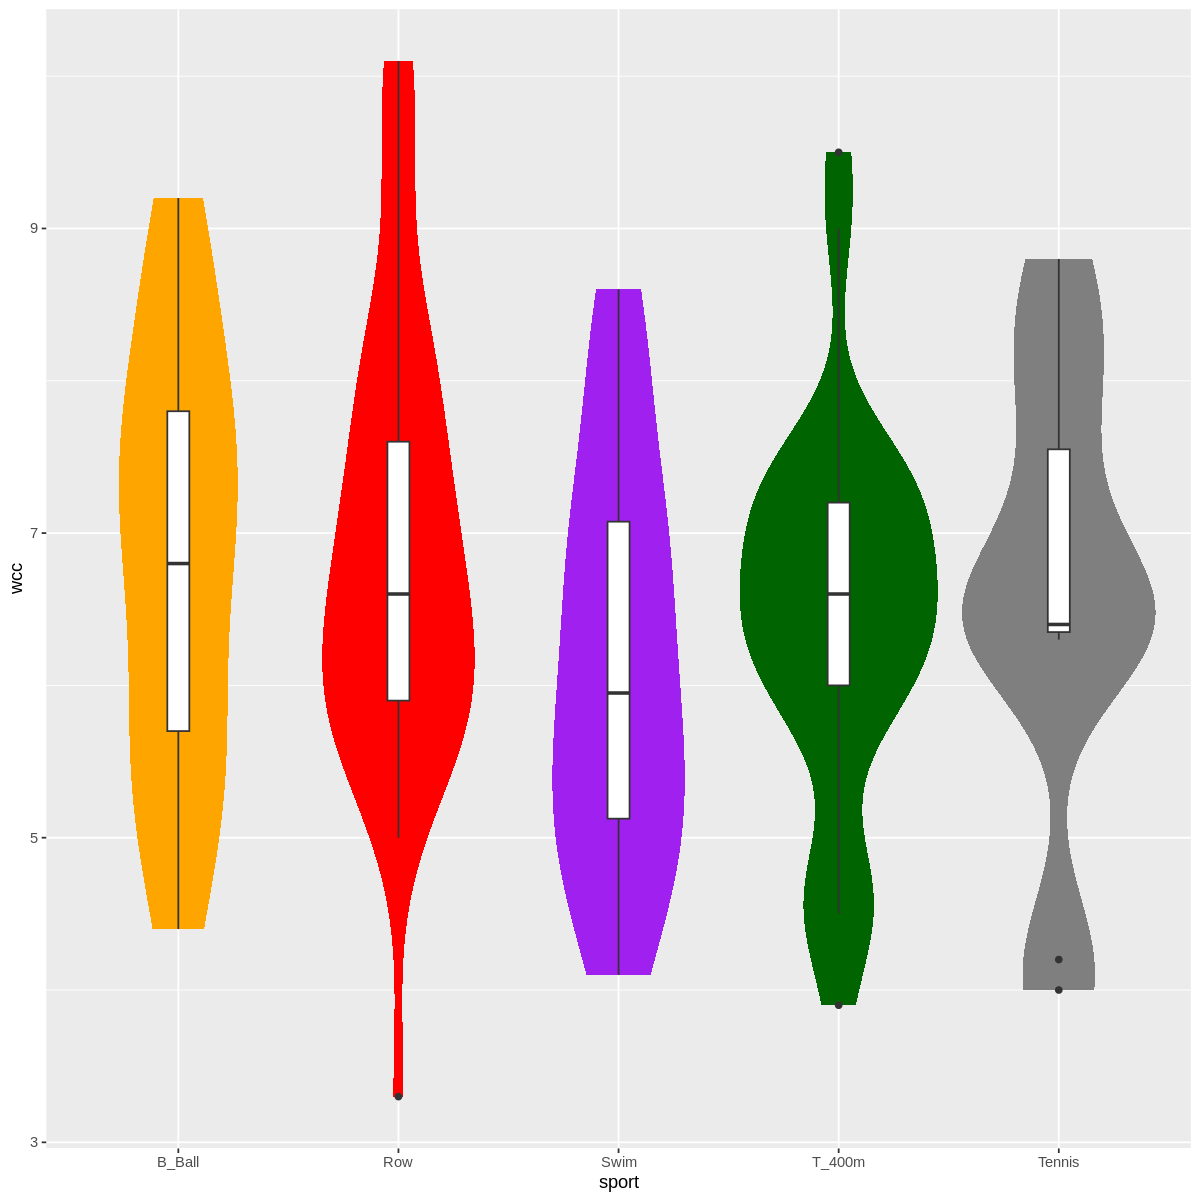

In [ ]:
ggplot(data_ais, aes(sport, wcc)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = 'orange', 'Row' = 'Red', 'Swim' = 'purple', 'T_400m' = 'darkgreen', 'Tennis' = 'blue'))


Para acabar de concluir y tener de una forma más clara, también hace falta graficarlo. Usaremos el gráfico de violín, que nos muestra el intervalo de confianza al 95% (línea central), el rango intercuartil (rectángulo blanco) y la frecuencia (anchura).

Cuando graficamos las distribuciones de cada uno de los deportes en cada variable vemos que todos los gráficos se ubican en una posición similar, por lo tanto, podemos ver que no parecen verse grandes diferencias entre las medidas.

Si bien si parece haber diferencias en las frecuencias, sobre todo en el gráfico del factor 'WCC' este no es el tema que estamos estudiando.

# ANOVA TWO-WAY

Ahora vamos a indagar un poco más, usando dos variables continuas distintas, y intentaremos indagar en las diferencias que existan (o no) teniendo en cuenta ahora los dos factores del dataset, sex y sport. Con esta prueba de ANOVA vamos a poder intuir las diferencias usando los dos factores independientemente y las de ambos a la vez.

De esta manera podremos intuir mejor la significancia de estos dos factores y entender que aportarían a un potencial modelo.

In [ ]:
anova3 = aov(hc ~ sex * sport, data = data_ais)
summary(anova3)

             Df Sum Sq Mean Sq F value Pr(>F)    
sex           1  533.9   533.9 107.238 <2e-16 ***
sport         4   36.9     9.2   1.855  0.123    
sex:sport     4   15.2     3.8   0.765  0.550    
Residuals   114  567.6     5.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
anova4 = aov(hg ~ sex * sport, data = data_ais)
summary(anova4)

             Df Sum Sq Mean Sq F value Pr(>F)    
sex           1  88.07   88.07 123.813 <2e-16 ***
sport         4   5.65    1.41   1.986  0.101    
sex:sport     4   2.62    0.65   0.920  0.455    
Residuals   114  81.09    0.71                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Una vez hemos realizado los dos tests, uno para cada variable continua, en este caso 'HC' y 'HG', llegamos a una serie de conclusiones:
- Variable HC:
    - Rechazamos la hipótesis nula en el caso de Sex ya que el p-value es muy, muy pequeño. Por lo tanto podemos aceptar la hipótesis alternativa que nos dice que existe una diferencia entre las medias en función de si los atletas son hombres o mujeres
    - Aceptamos la hipótesis nula en el caso de Sport. El p-value es superior al 0,05 y, por lo tanto, no existe diferencia entre las medias.
    - Por último, aceptamos también la hipótesis nula para el caso de la combinación de ambos factores, entendiendo así que la combinación de estas variables no tiene impacto en las variables continuas de los atletas, HC, en este caso.

- Variable HG:
    - Tenemos la misma situación para los tres casos, empezando por Sex, donde rechazamos la hipótesis nula y confirmamos que el factor sexo influye en las medias de la variable HG. Y, por otro lado, aceptamos la hipótesis nula de la Sport y de la combinación de ambas. No viendo ningún efecto de estos dos factores en las medias de la variable continua HG.

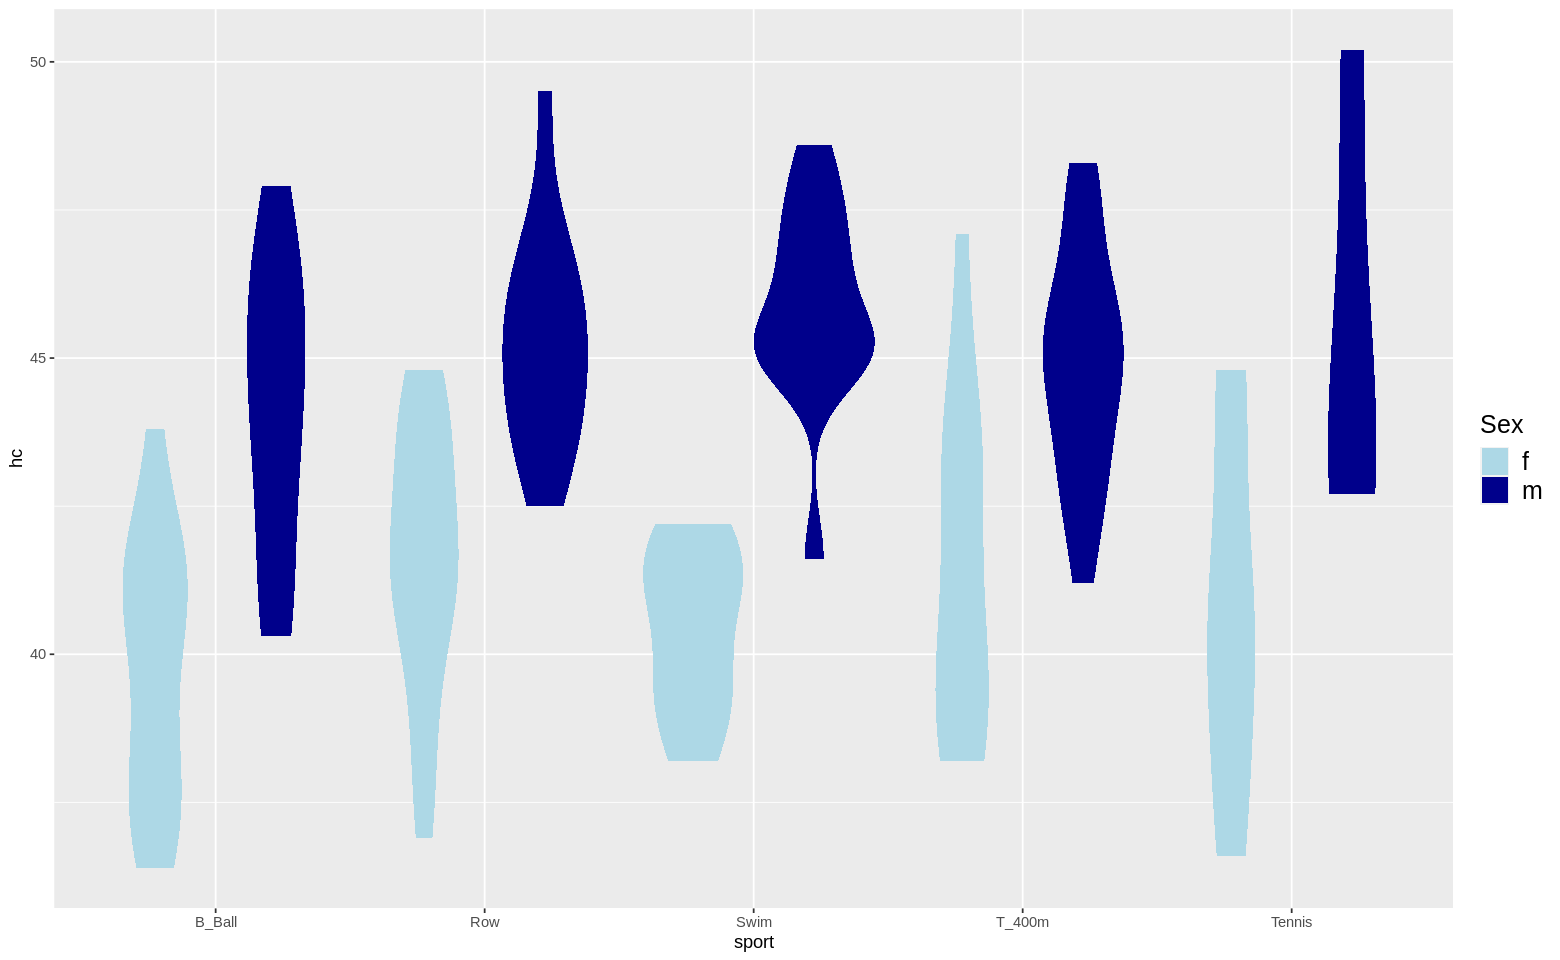

In [ ]:
ggplot(data_ais, aes(sport, hc, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right',
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('m' = 'darkblue', 'f' = 'lightblue')) +
  labs(fill = 'Sex')


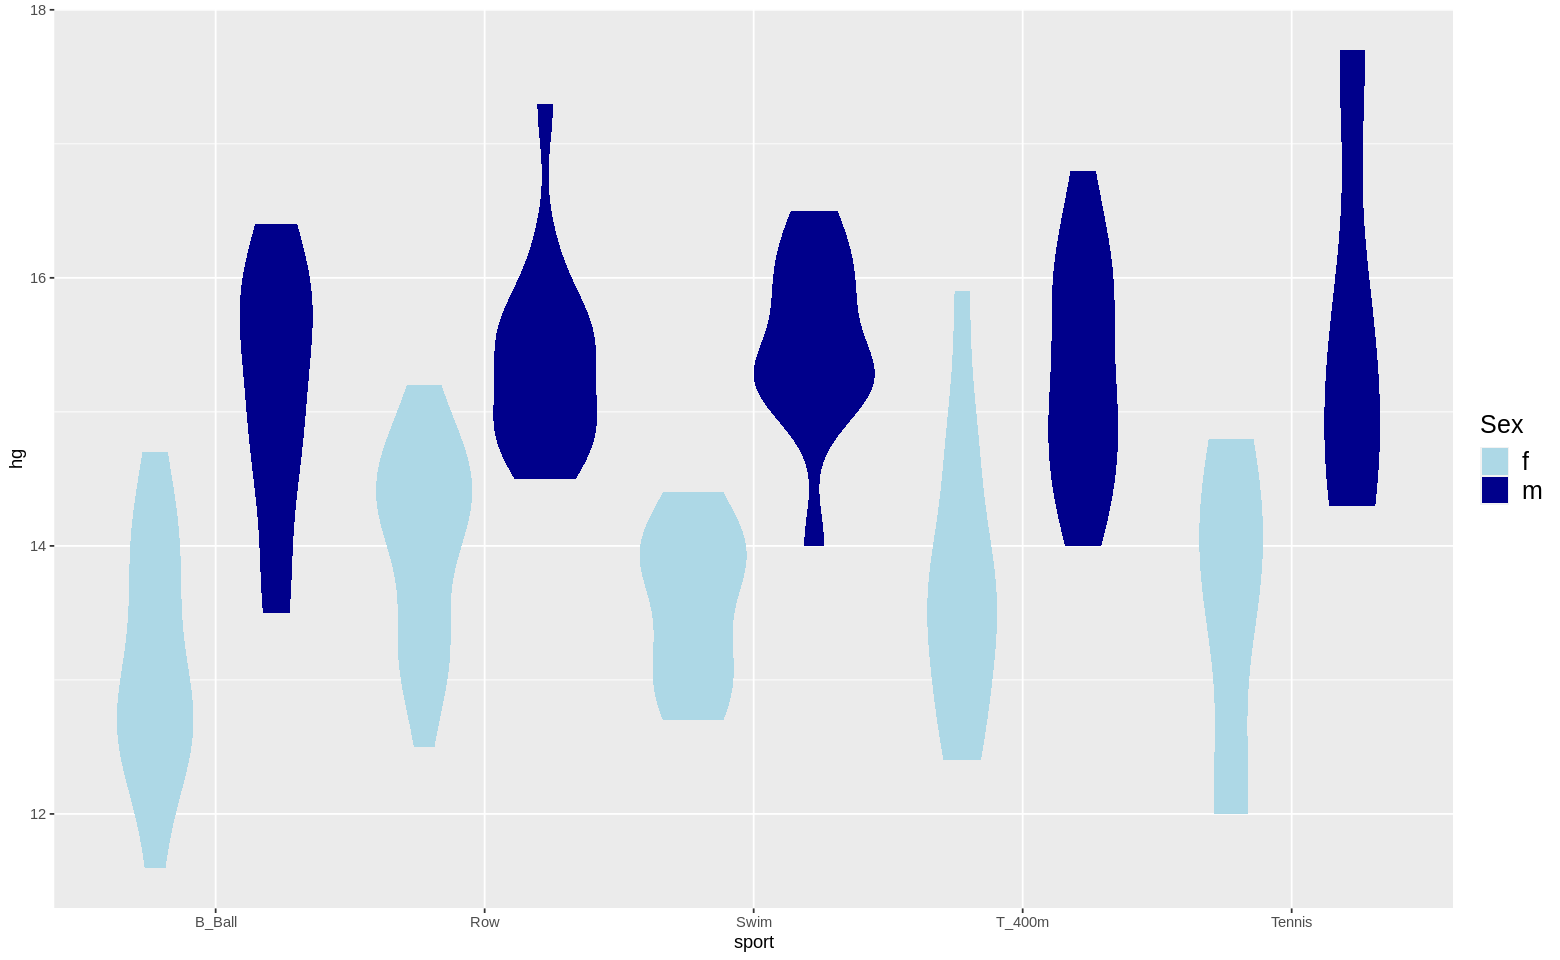

In [ ]:
ggplot(data_ais, aes(sport, hg, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right',
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('m' = 'darkblue', 'f' = 'lightblue')) +
  labs(fill = 'Sex')

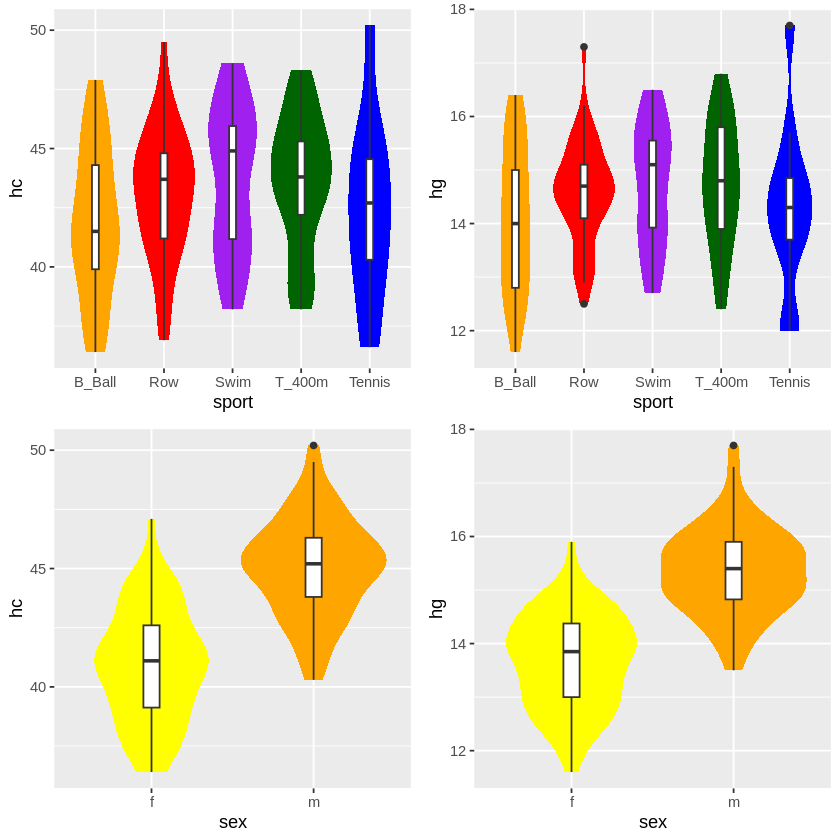

In [ ]:
ggplot1 <- ggplot(data_ais, aes(sport, hc)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = 'orange', 'Row' = 'Red', 'Swim' = 'purple', 'T_400m' = 'darkgreen', 'Tennis' = 'blue'))


ggplot2 <- ggplot(data_ais, aes(sport, hg)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = 'orange', 'Row' = 'Red', 'Swim' = 'purple', 'T_400m' = 'darkgreen', 'Tennis' = 'blue'))


ggplot3 <- ggplot(data_ais, aes(sex, hc)) +
  geom_violin(color = NA,aes(fill = factor(sex))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('m' = 'orange', 'f' = 'yellow'))

ggplot4 <- ggplot(data_ais, aes(sex, hg)) +
  geom_violin(color = NA,aes(fill = factor(sex))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('m' = 'orange', 'f' = 'yellow'))


grid.arrange(ggplot1, ggplot2, ggplot3, ggplot4, ncol = 2, nrow = 2)


Todo lo comentado anteriormente se ve de una forma más clara, si cabe, cuando graficamos los datos con el gráfico del tipo violín. Si nos fijamos, se ve una diferencia destacadísima entre los gráficos al segregar por Sex, y al compararlos con el gráfico del mismo deporte del sexo opuesto se observa claramente mucha distancia entre las distribuciones.

Por otro lado, si hacemos el ejercicio de unir fijarnos en el rango de la suma de los gráficos de cada deporte, podemos observar bastante coincidencia entre estos, dando entender lo que se ha observado en el ANOVA, los deportes no tienen influencia.

Esto último que comentamos se ve de una manera muchísimo más clara en el tercer gráfico, donde, si nos fijamos en los dos superiores, vemos que la diferencia entre las medias de los distintos deportes muy pequeñas y los gráficos están muy igualados. Por otro lado, en los dos gráficos inferiores, podemos observar como las medias sí que son bastante distintas, los gráficos están muy desplazados y, de hecho, para las dos variables distintas, los valores de 'f' son notablemente inferiores.

# Conclusiones

Hasta aquí ha llegado un extenso análisis de un data set que contenía observaciones sobre variables médicas de distintos deportistas y factores que nos clasificaban estos deportistas en función de su sexo y el deporte que practican.

Se ha analizado todo el dataset con un análisis descriptivo, analizado la distribución de cada una de las variables continuas, que parece ser normal en la mayoría de los casos, los posibles outliers, los valores nulos (que han resultado ser inexistentes), y entendiendo el comportamiento de nuestros factores y como de balanceados estaban.

A partir de aquí, se ha hecho un análisis de covariancia y correlación para entender que variables estaban más relacionadas entre sí. En este apartado, hemos empezado a sacar información muy importante que se nos ha confirmado más adelante. Al graficar la matriz de scatter plots y pintar los datos en función primero del factor Sex y después de Sport, hemos empezado a observar como en el primer caso se podía observar cierta agrupación entre los puntos de un mismo grupo y en el segundo era toda una mezcla heterogénea de puntos.

Para seguir con nuestro análisis se han hecho los tests de ANOVA, con su previa y correspondiente comprobación del cumplimiento de sus supuestos.

Los dos tests One-Way y Two-Way nos han aportado informaciones valiosas. Para empezar hemos visto que no existía un claro impacto en las medias de las variables 'RCC' y 'WCC' cuando queremos diferenciar por deporte. Y por último, con la prueba Two-Way, hemos concluido que los resultados de 'HC' y 'HG' sí que se ven afectados por la variable Sex pero no por la variable Sport o por la combinación de ambas.

Esto nos confirma un poco lo que habíamos visto con la matriz de scatters, existen dos grupos muy claros en cuanto a sexo debido a que los resultados 'médicos' de los deportistas son mucho más diferentes entre hombres y mujeres que en los casos que queremos distinguir por deportes.